In [ ]:
!pip install  openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
!pip install instructor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: jiter
    Found existing installation: jiter 0.6.0
    Uninstalling jiter-0.6.0:
      Successfully uninstalled jiter-0.6.0


In [ ]:
!pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
import base64
import os
from openai import OpenAI # openai version 1.1.1
import instructor
import requests
from pydantic.main import BaseModel
from PIL import Image

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "Your OpenAI API Key"
client = instructor.patch(OpenAI())

In [ ]:
def display_images(train_image_path):
    # Open and resize the training image
    train_image = Image.open(train_image_path).resize((500, 250))
    # print("Image")
    display(train_image)

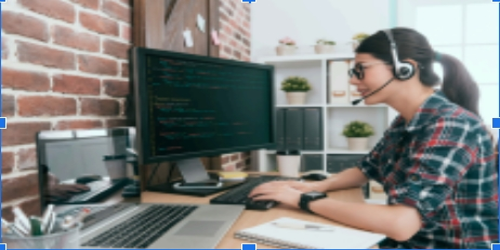

**Object Identification:**

| Element           | Count |
|-------------------|-------|
| Screens           | 2     |
| Laptops           | 1     |
| Keyboard and mouse| 1     |

**Back Support Analysis:**

- Upper back: Not Supported
- Mid back: Supported
- Lower back: Supported

**Distance from Screen Analysis:**

- Less than one arm’s length


In [ ]:
image_path1 = "/content/img1.jpeg"
base64_image1 = encode_image(image_path1)

client = OpenAI()
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": f"""Instructions:

                Tasks:
                  ● Object Identification:
                  ○ Detect specific objects in the image and display the count for each:
                  ■ Screens (monitors, laptops, etc.)
                  ■ Laptops
                  ■ Keyboard and mouse
                  ○ Output Requirement: Display the results in a table format showing each element and its count.
                  ● Back Support Analysis:
                  ○ Determine which parts of the back (upper, mid, lower) are in contact with the chair’s back support. (i.e) When a person is sitting on a chair and working, there are possibilities that he is fully sitting back on the chair where his back (upper, mid and lower) is fully touching and supported on the back of the chair, but there is a also a possibility that, only certain portions or even they sit in a way where their back is not supported on the back of the chair.
                  ○ For each section, specify whether it is "Supported" or "Not Supported."
                  ○ Output Requirement: Display the analysis for upper, mid, and lower back in a simple list format.
                  ● Distance from Screen Analysis:
                  ○ Measure the distance between the person and the screen.
                  ○ Indicate whether the distance is "Less than one arm’s length," "One arm’s length," or "More than one arm’s length."
                  ○ Output Requirement: Just Display the distance assessment clearly on the result screen. No further explanation or add on is required.


            """,
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image1}"
              },
          },
          # {
          #   "type": "image_url",
          #   "image_url": {
          #     "url": f"data:image/jpeg;base64,{base64_image2}"
          #     },
          # },
        ],
    }
  ],
  max_tokens=300,
)
response = response.choices[0]

display_images(image_path1)
print(response.message.content)

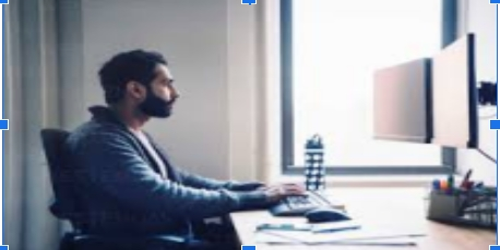

## Object Identification

| Element          | Count |
|------------------|-------|
| Screens          | 2     |
| Laptops          | 0     |
| Keyboard and mouse | 1   |

## Back Support Analysis

- Upper back: Not Supported
- Mid back: Supported
- Lower back: Supported

## Distance from Screen Analysis

- Distance: One arm’s length


In [ ]:
image_path1 = "/content/img2.jpeg"
base64_image1 = encode_image(image_path1)

client = OpenAI()
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"""Instructions:

               Tasks:
                ● Object Identification:
                ○ Detect specific objects in the image and display the count for each:
                ■ Screens (monitors, laptops, etc.)
                ■ Laptops
                ■ Keyboard and mouse
                ○ Output Requirement: Display the results in a table format showing each element and its count.
                ● Back Support Analysis:
                ○ Determine which parts of the back (upper, mid, lower) are in contact with the chair’s back support. (i.e) When a person is sitting on a chair and working, there are possibilities that he is fully sitting back on the chair where his back (upper, mid and lower) is fully touching and supported on the back of the chair, but there is a also a possibility that, only certain portions or even they sit in a way where their back is not supported on the back of the chair.
                ○ For each section, specify whether it is "Supported" or "Not Supported."
                ○ Output Requirement: Display the analysis for upper, mid, and lower back in a simple list format.
                ● Distance from Screen Analysis:
                ○ Measure the distance between the person and the screen.
                ○ Indicate whether the distance is "Less than one arm’s length," "One arm’s length," or "More than one arm’s length."
                ○ Output Requirement: Just Display the distance assessment clearly on the result screen. No further explanation or add on is required.


          """,
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image1}"
            },
        },
      ],
    }
  ],
  max_tokens=300,
)
response = response.choices[0]

display_images(image_path1)
print(response.message.content)

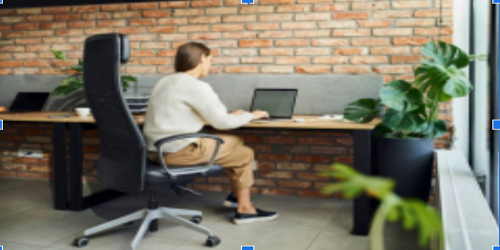

## Object Identification:

| Object          | Count |
|-----------------|-------|
| Screens         | 1     |
| Laptops         | 1     |
| Keyboard and mouse | 0   |

## Back Support Analysis:

- Upper back: Not Supported
- Mid back: Not Supported
- Lower back: Not Supported

## Distance from Screen Analysis:

- Less than one arm’s length


In [ ]:
image_path1 = "/content/img3.jpeg"
base64_image1 = encode_image(image_path1)

client = OpenAI()
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"""Instructions:

               Tasks:
                ● Object Identification:
                ○ Detect specific objects in the image and display the count for each:
                ■ Screens (monitors, laptops, etc.)
                ■ Laptops
                ■ Keyboard and mouse
                ○ Output Requirement: Display the results in a table format showing each element and its count.
                ● Back Support Analysis:
                ○ Determine which parts of the back (upper, mid, lower) are in contact with the chair’s back support. (i.e) When a person is sitting on a chair and working, there are possibilities that he is fully sitting back on the chair where his back (upper, mid and lower) is fully touching and supported on the back of the chair, but there is a also a possibility that, only certain portions or even they sit in a way where their back is not supported on the back of the chair.
                ○ For each section, specify whether it is "Supported" or "Not Supported."
                ○ Output Requirement: Display the analysis for upper, mid, and lower back in a simple list format.
                ● Distance from Screen Analysis:
                ○ Measure the distance between the person and the screen.
                ○ Indicate whether the distance is "Less than one arm’s length," "One arm’s length," or "More than one arm’s length."
                ○ Output Requirement: Just Display the distance assessment clearly on the result screen. No further explanation or add on is required.


          """,
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image1}"
            },
        },
      ],
    }
  ],
  max_tokens=300,
)
response = response.choices[0]

display_images(image_path1)
print(response.message.content)

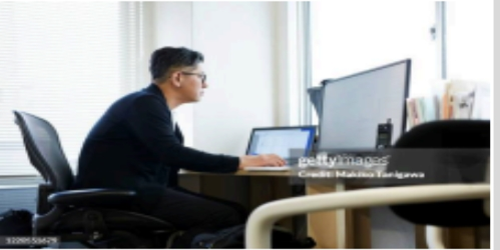

## Object Identification

| Element            | Count |
|--------------------|-------|
| Screens            | 2     |
| Laptops            | 1     |
| Keyboard and mouse | 1     |

## Back Support Analysis

- Upper back: Not Supported
- Mid back: Not Supported
- Lower back: Not Supported

## Distance from Screen Analysis

- Less than one arm’s length


In [ ]:
image_path1 = "/content/img4.jpeg"
base64_image1 = encode_image(image_path1)

client = OpenAI()
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"""Instructions:

               Tasks:
                ● Object Identification:
                ○ Detect specific objects in the image and display the count for each:
                ■ Screens (monitors, laptops, etc.)
                ■ Laptops
                ■ Keyboard and mouse
                ○ Output Requirement: Display the results in a table format showing each element and its count.
                ● Back Support Analysis:
                ○ Determine which parts of the back (upper, mid, lower) are in contact with the chair’s back support. (i.e) When a person is sitting on a chair and working, there are possibilities that he is fully sitting back on the chair where his back (upper, mid and lower) is fully touching and supported on the back of the chair, but there is a also a possibility that, only certain portions or even they sit in a way where their back is not supported on the back of the chair.
                ○ For each section, specify whether it is "Supported" or "Not Supported."
                ○ Output Requirement: Display the analysis for upper, mid, and lower back in a simple list format.
                ● Distance from Screen Analysis:
                ○ Measure the distance between the person and the screen.
                ○ Indicate whether the distance is "Less than one arm’s length," "One arm’s length," or "More than one arm’s length."
                ○ Output Requirement: Just Display the distance assessment clearly on the result screen. No further explanation or add on is required.


          """,
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image1}"
            },
        },
    }
  ],
  max_tokens=300,
)
response = response.choices[0]

display_images(image_path1)
print(response.message.content)